# No 1

In [317]:
from tensorflow import keras
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

# Load Data, save to data/fashion folder
data = input_data.read_data_sets('data/fashion')
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Create Array of name for each class (0-9)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


In [318]:
from PIL import Image
import numpy as np
import cv2

# edge detection function for set if images, this function is for feature extraction
def edge_detection(data):
    RGB = []
    for i in range(data.shape[0]):
        img = Image.fromarray(data[i])
        img = img.convert("RGB")
        RGB.append(np.asarray(img))
    RGB = np.asarray(RGB)
    
    arr_img = []
    for i in range(RGB.shape[0]):
        arr_img.append(cv2.Canny(RGB[i],100,100,L2gradient=False))
    arr_img = np.asarray(arr_img)
    return arr_img

# Normalize data from 3 dimention to 2 dimention
def normalize(data):
    nsamples, nx, ny = data.shape
    data = data.reshape((nsamples,nx*ny))
    return data

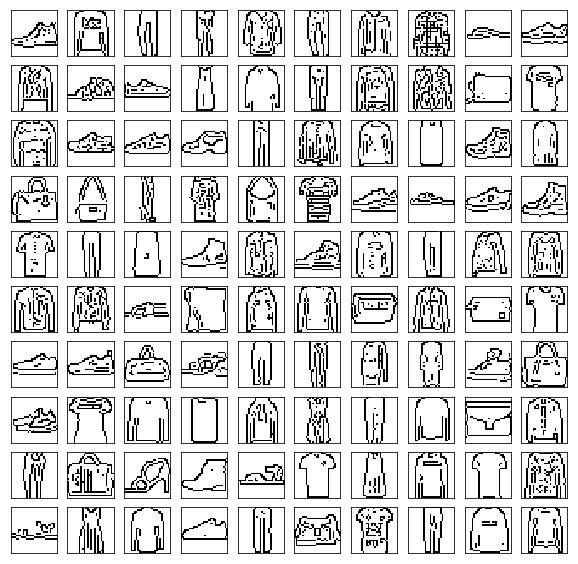

In [319]:
# Convert data train and data with edge detection function, then normalize the data
# Train data
train_images = edge_detection(x_train)
train_images = normalize(train_images)
# Test data
test_images = edge_detection(x_test)
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary) # using edge detection, for testing
plt.show()
test_images = normalize(test_images)

In [320]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

# Create model of SVC (support vector classifier)
clf = LinearSVC(tol=1e-4)
clf.fit(train_images, y_train)

C:\Users\mferi\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [321]:
# Predict Datatest
y_test = clf.predict(test_images)

# Accuracy of train model
accuracy = clf.score(train_images, y_train)
print(accuracy)

0.7846833333333333


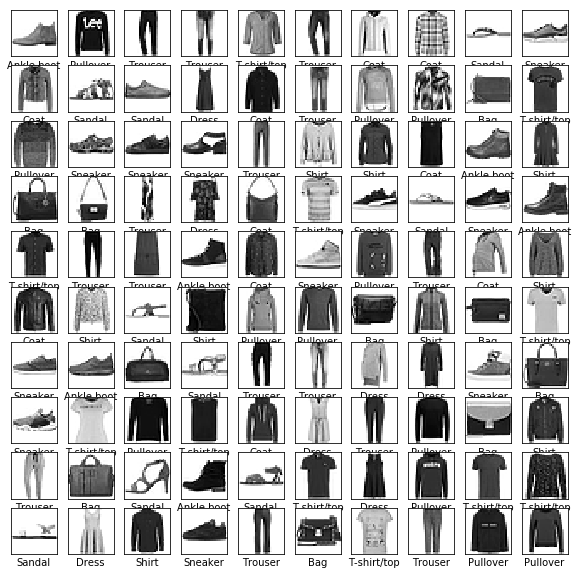

In [326]:
# Display first 100 images from data test with predicted label
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_test[i], cmap=plt.cm.binary) # before use edge detection function
    plt.xlabel(class_names[y_test[i]])
plt.show()

# No 2

In [327]:
import cv2
import glob

# Load new data test from datatest folder
image_list = []
for filename in glob.glob('datatest/*.jpg'):
    im = cv2.imread(filename,2)
    im = cv2.resize(im, (28, 28), interpolation = cv2.INTER_AREA) # resize to 28 * 28 pixel size
    #im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # convert to grayscale
    im = cv2.bitwise_not(im) # invers color
    image_list.append(im)
    
manual_label = np.array([0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9])

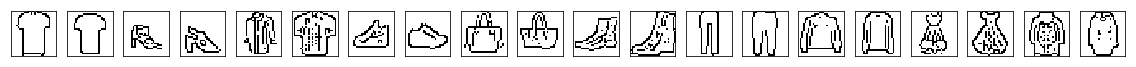

In [328]:
# Convert new data test, convert to numpy array
image_list = np.array(image_list)

# Use Edge detection for feature extraction
new_test_images = edge_detection(image_list) 
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(20,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(new_test_images[i], cmap=plt.cm.binary)# with edge detection, for testing
plt.show()
new_test_images = normalize(new_test_images)

In [329]:
# Predict Datatest
test_labels = clf.predict(new_test_images)

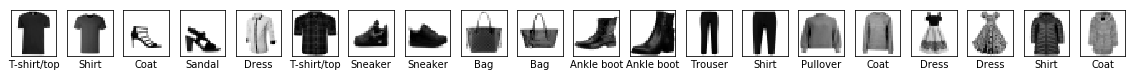

In [330]:
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(20,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_list[i], cmap=plt.cm.binary)# From previous image, not for testing
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [331]:
# Accuracy of train model
from sklearn.metrics import accuracy_score
accuracy_score(manual_label,test_labels)

0.1